# <center>Data Analysis and Collection Formation based on ObeservationIds</center>
## <center>First Approach to Collection formation</center>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('plantCLFcollection.csv')
df.shape

(14132, 8)

## Data Analysis

In [3]:
df.head(10)

,FileName,ObservationId,MediaId,ClassId,Content,Family,Genus,Species
0,59906.xml,14317,59906,3297,Leaf,Fagaceae,Quercus,Quercus suber L.
1,105943.xml,22639,105943,3283,Flower,Fagaceae,Quercus,Quercus coccifera L.
2,59912.xml,37997,59912,3297,Leaf,Fagaceae,Quercus,Quercus suber L.
3,22422.xml,38651,22422,3288,Flower,Fagaceae,Quercus,Quercus ilex L.
4,8405.xml,21829,8405,3288,Leaf,Fagaceae,Quercus,Quercus ilex L.
5,3236.xml,5116,3236,3288,Leaf,Fagaceae,Quercus,Quercus ilex L.
6,110369.xml,35990,110369,3282,Leaf,Fagaceae,Quercus,Quercus cerris L.
7,44770.xml,38651,44770,3288,Flower,Fagaceae,Quercus,Quercus ilex L.
8,102779.xml,12203,102779,30308,Leaf,Fagaceae,Quercus,Quercus robur L.
9,78506.xml,24847,78506,3288,Flower,Fagaceae,Quercus,Quercus ilex L.


In [4]:
df.Content.value_counts()

Leaf      7066
Flower    7066
Name: Content, dtype: int64

In [5]:
df.Genus.value_counts()

Prunus       510
Acer         464
Geranium     392
Crataegus    352
Viburnum     338
            ... 
Orchis        40
Tanacetum     40
Crepis        40
Melia         40
Cichorium     40
Name: Genus, Length: 140, dtype: int64

In [6]:
df.Family.value_counts()

Rosaceae          1692
Asteraceae        1248
Fabaceae          1240
Sapindaceae        622
Lamiaceae          582
                  ... 
Phytolaccaceae      42
Balsaminaceae       42
Passifloraceae      42
Orchidaceae         40
Meliaceae           40
Name: Family, Length: 64, dtype: int64

In [7]:
df.Species.value_counts()

Crataegus monogyna Jacq.     231
Cercis siliquastrum L.       208
Viburnum tinus L.            186
Syringa vulgaris L.          180
Aesculus hippocastanum L.    158
                            ... 
Silene italica (L.) Pers.      1
Viola alba Besser              1
Silene uniflora Roth           1
Quercus palustris Münchh.      1
Salix herbacea L.              1
Name: Species, Length: 450, dtype: int64

In [8]:
df.ObservationId.value_counts()

19       54
25576    46
23251    42
30480    36
4365     36
         ..
37081     1
25343     1
2818      1
37641     1
28095     1
Name: ObservationId, Length: 5984, dtype: int64

In [10]:
df[df.ObservationId == 22639].Content.value_counts()

Flower    15
Name: Content, dtype: int64

In [24]:
def display_image_grid(df, image_dir, num_images=12, cols=4):
  rand_idx = np.random.choice(df.shape[0],num_images)
  rows = num_images // cols
  figure, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(16,9))
  for i in range(len(rand_idx)):
    img_path = os.path.join(image_dir, df.FileName[rand_idx[i]].split('.')[0] + '.jpg')
    image = plt.imread(img_path)
    ax.ravel()[i].imshow(image)
    ax.ravel()[i].set_title(df.Genus[rand_idx[i]])
    ax.ravel()[i].set_axis_off()
  plt.tight_layout()
  plt.show()

## Some Example Images 

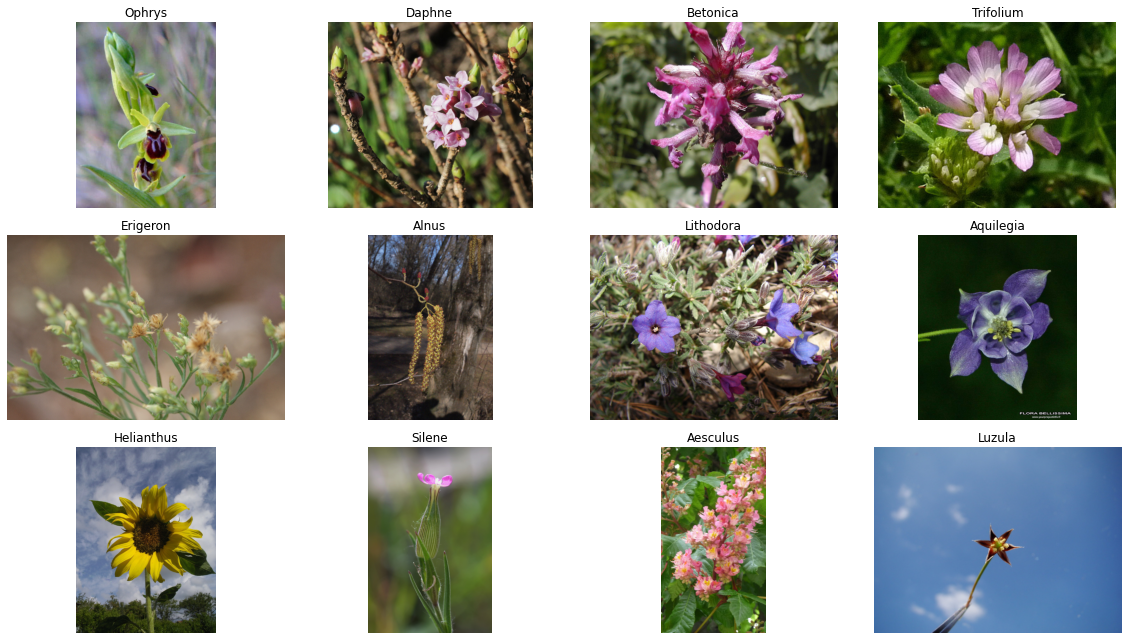

In [25]:
content = "Flower"
image_dir = "train-jpg"
df_content = df[df.Content == content].reset_index()
display_image_grid(df=df_content,image_dir=image_dir)

## Data filteration

### Step 1: Filtering "Flower" and "Leaves" from dataset

In [26]:
df_LeafandFlower = df[df.Content.isin(['Flower','Leaf','LeafScan'])].reset_index(drop=True)
df_LeafandFlower.shape

(54197, 6)

In [27]:
df_LeafandFlower.head()

,FileName,ObservationId,Content,Family,Genus,Species
0,46826.xml,7354,Flower,Caryophyllaceae,Myosoton,Myosoton aquaticum (L.) Moench
1,5848.xml,5554,Flower,Linaceae,Linum,Linum usitatissimum L.
2,31476.xml,25185,LeafScan,Betulaceae,Carpinus,Carpinus betulus L.
3,68503.xml,9663,Flower,Orchidaceae,Ophrys,Ophrys aranifera Huds.
4,59906.xml,14317,Leaf,Fagaceae,Quercus,Quercus suber L.


### Step 2: Filter out Observation Ids with less than 2 unique Contents

In [28]:
for i in df_LeafandFlower.ObservationId:
    df_con = df_LeafandFlower[df_LeafandFlower.ObservationId == i]
    if df_con.Content.nunique() < 2:
        df_LeafandFlower = df_LeafandFlower.drop(df_con.index)
df_LeafandFlower_filtered = df_LeafandFlower.reset_index(drop=True)
print(df_LeafandFlower_filtered.shape)

(16025, 6)


## Collection Formation based on Observation Ids

In [29]:
collection_dict = {}
for key in df_LeafandFlower_filtered.index:
    collection_dict[key] = 0

In [30]:
collection_counter = 0
for obj in df_LeafandFlower_filtered.ObservationId.unique():
    df_obj = df_LeafandFlower_filtered[df_LeafandFlower_filtered.ObservationId == obj]
    flower_df = df_obj[df_obj.Content == "Flower"]
    leaf_df = df_obj[~df_obj.index.isin(flower_df.index)]
    cut_off = flower_df.shape[0] if flower_df.shape[0] <= leaf_df.shape[0] else leaf_df.shape[0]
    if cut_off != 0:
        flower_df_sel_index = flower_df.sample(n=cut_off).index
        leaf_df_sel_index = leaf_df.sample(n=cut_off).index
        for i in range(cut_off):
            collection_counter += 1
            collection_dict[flower_df_sel_index[i]] = collection_counter
            collection_dict[leaf_df_sel_index[i]] = collection_counter

In [31]:
df_LeafandFlower_filtered['index'] = df_LeafandFlower_filtered.index
df_LeafandFlower_filtered

,FileName,ObservationId,Content,Family,Genus,Species,index
0,46826.xml,7354,Flower,Caryophyllaceae,Myosoton,Myosoton aquaticum (L.) Moench,0
1,5690.xml,3021,Flower,Asteraceae,Inula,Inula conyza DC.,1
2,80915.xml,25877,Flower,Caprifoliaceae,Succisa,Succisa pratensis Moench,2
3,53595.xml,27077,Leaf,Smilacaceae,Smilax,Smilax aspera L.,3
4,106292.xml,29808,Flower,Lamiaceae,Lamium,Lamium galeobdolon (L.) L.,4
...,...,...,...,...,...,...,...
16020,6380.xml,24372,Leaf,Adoxaceae,Sambucus,Sambucus nigra L.,16020
16021,34517.xml,8173,LeafScan,Rosaceae,Sorbus,Sorbus aria (L.) Crantz,16021
16022,66537.xml,16787,Flower,Asteraceae,Bidens,Bidens pilosa L.,16022
16023,48812.xml,12306,Flower,Fabaceae,Medicago,Medicago sativa L.,16023


In [32]:
df_LeafandFlower_filtered['CollectionId'] = df_LeafandFlower_filtered['index'].map(collection_dict)
df_LeafandFlower_filtered

,FileName,ObservationId,Content,Family,Genus,Species,index,CollectionId
0,46826.xml,7354,Flower,Caryophyllaceae,Myosoton,Myosoton aquaticum (L.) Moench,0,0
1,5690.xml,3021,Flower,Asteraceae,Inula,Inula conyza DC.,1,0
2,80915.xml,25877,Flower,Caprifoliaceae,Succisa,Succisa pratensis Moench,2,0
3,53595.xml,27077,Leaf,Smilacaceae,Smilax,Smilax aspera L.,3,8
4,106292.xml,29808,Flower,Lamiaceae,Lamium,Lamium galeobdolon (L.) L.,4,10
...,...,...,...,...,...,...,...,...
16020,6380.xml,24372,Leaf,Adoxaceae,Sambucus,Sambucus nigra L.,16020,0
16021,34517.xml,8173,LeafScan,Rosaceae,Sorbus,Sorbus aria (L.) Crantz,16021,0
16022,66537.xml,16787,Flower,Asteraceae,Bidens,Bidens pilosa L.,16022,0
16023,48812.xml,12306,Flower,Fabaceae,Medicago,Medicago sativa L.,16023,1814


In [33]:
df_collection = df_LeafandFlower_filtered[df_LeafandFlower_filtered.CollectionId != 0]

In [34]:
df_collection = df_collection.drop(['index'],axis=1)
df_collection

,FileName,ObservationId,Content,Family,Genus,Species,CollectionId
3,53595.xml,27077,Leaf,Smilacaceae,Smilax,Smilax aspera L.,8
4,106292.xml,29808,Flower,Lamiaceae,Lamium,Lamium galeobdolon (L.) L.,10
6,52853.xml,10219,Leaf,Ranunculaceae,Clematis,Clematis vitalba L.,20
7,65999.xml,30201,Leaf,Betulaceae,Betula,Betula pendula Roth,21
8,111088.xml,17247,Leaf,Sapindaceae,Acer,Acer negundo L.,25
...,...,...,...,...,...,...,...
16017,42481.xml,13068,Flower,Cannabaceae,Humulus,Humulus lupulus L.,4132
16018,73884.xml,16692,Flower,Lauraceae,Laurus,Laurus nobilis L.,322
16019,24704.xml,31517,Flower,Malvaceae,Malva,Malva sylvestris L.,5156
16023,48812.xml,12306,Flower,Fabaceae,Medicago,Medicago sativa L.,1814


## Filter out Genus with less than 20 collections

In [35]:
df_collection_filtered = df_collection.copy()
for genus in df_collection.Genus.unique():
    df_genus = df_collection[df_collection.Genus == genus]
    if df_genus.shape[0] < 40:
        df_collection_filtered = df_collection_filtered.drop(df_genus.index)
print(df_collection_filtered.shape)

(5610, 7)


In [36]:
df_collection_filtered.Genus.value_counts()

Geranium      306
Verbascum     192
Quercus       138
Malva         138
Cirsium       132
             ... 
Ficaria        42
Althaea        40
Punica         40
Cymbalaria     40
Lysimachia     40
Name: Genus, Length: 76, dtype: int64

In [37]:
df_collection_filtered.to_csv("plantCLFcollection_ObservationID.csv",index=False)